In [109]:
import utilities as util
import importlib
import matplotlib.pyplot as plt
importlib.reload(util)
import numpy as np
import pandas as pd

['c:\\Users\\Vince\\OneDrive\\Documenten\\School\\TU\\2223\\modelling-networks-and-data-analysis\\project_higgs\\higgs-twitter-network-science\\src', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\python39.zip', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\DLLs', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39', '', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages', 'c:\\users\\vince\\projects\\fantoom\\emmel\\basy-synths', 'c:\\users\\vince\\projects\\fantoom\\emmel\\evairy', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\Pythonwin', 'c:\\Users\\Vince\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\IPy

In [110]:
reply_path = '../log/reply.csv'
retweet_path = '../log/retweet.csv'
mention_path = '../log/mention.csv'

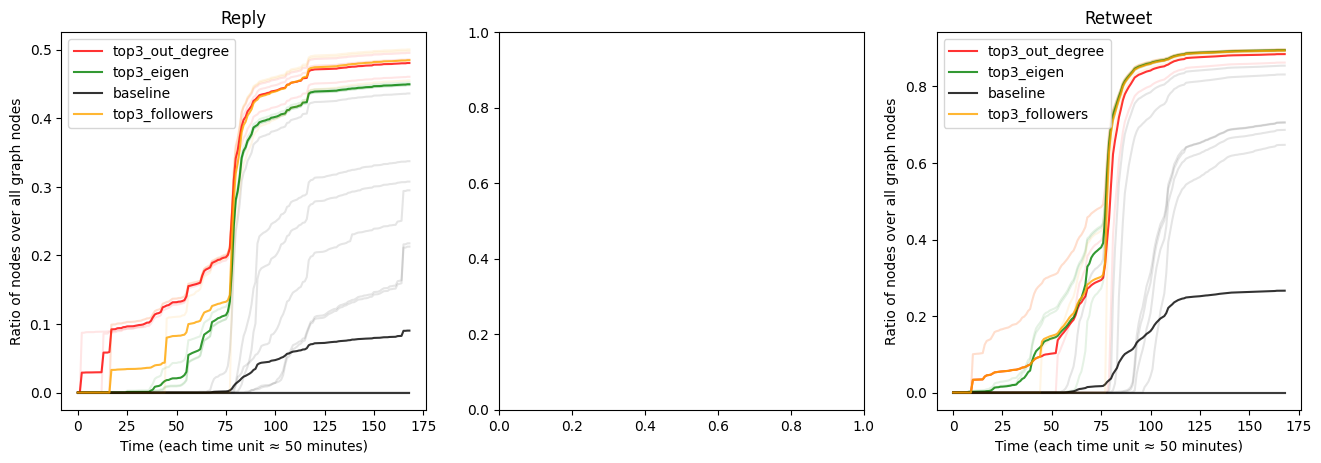

In [111]:
fig = plt.figure(figsize = (16, 5), dpi=100)
axes = fig.subplots(1, 3)
util.plot_all_graph_metrics(axes[0], reply_path, graph_name="Reply")
# util.plot_all_graph_metrics(axes[1], mention_path, keywords=['out_degree'], graph_name="Mention")
util.plot_all_graph_metrics(axes[2], retweet_path, graph_name="Retweet")

In [126]:
def metric(path, name):
    index = []
    out = {}
    for kw in util.BASE_KEYWORDS:
        m, v = util.get_average_information_spreading_from_log(path, util.get_metric_name_from_keyword(kw))
        end_values = v[:, -1]
        
        out[kw] = {}
        out[kw]['end'] = np.mean(end_values)
        out[kw]['start_time'] = np.mean(np.argmax(np.where(v > 0, 1, 0), axis = 1))
        out[kw]['max_derivative'] = np.mean(np.max(np.diff(v, axis =1 ), axis =1))
        index.append((name, kw))
    return out, index

In [143]:
reply_data,index = metric(reply_path, 'reply')
mention_data,index = metric(mention_path, 'mention')
retweet_data,index = metric(retweet_path, 'retweet')

In [144]:
index = pd.MultiIndex.from_tuples(index, names=['graph', 'metric'])

In [150]:
df = pd.concat([pd.DataFrame(reply_data), pd.DataFrame(mention_data), pd.DataFrame(retweet_data)], axis=0)

In [152]:
df

mention                                            \
                 baseline top3_eigen top3_followers top3_out_degree   
end                   NaN        NaN            NaN             NaN   
start_time            NaN        NaN            NaN             NaN   
max_derivative        NaN        NaN            NaN             NaN   
end              0.102837   0.840782       0.848956        0.841223   
start_time      13.500000  20.000000      35.666667        5.666667   
max_derivative   0.012301   0.090126       0.109379        0.092467   
end                   NaN        NaN            NaN             NaN   
start_time            NaN        NaN            NaN             NaN   
max_derivative        NaN        NaN            NaN             NaN   

                    reply                                            \
                 baseline top3_eigen top3_followers top3_out_degree   
end              0.090381   0.449850       0.484891        0.480820   
start_time      25.800000  26.666667      46.666667       10.666667   
max_derivative   0.017512   0.064249       0.113743        0.090765   
end                   NaN        NaN            NaN             NaN   
start_time            NaN        NaN            NaN             NaN   
max_derivative        NaN        NaN            NaN             NaN   
end                   NaN        NaN            NaN             NaN   
start_time            NaN        NaN            NaN             NaN   
max_derivative        NaN        NaN            NaN             NaN   

                  retweet                                            
                 baseline top3_eigen top3_followers top3_out_degree  
end                   NaN        NaN            NaN             NaN  
start_time            NaN        NaN            NaN             NaN  
max_derivative        NaN        NaN            NaN             NaN  
end                   NaN        NaN            NaN             NaN  
start_time            NaN        NaN            NaN             NaN  
max_derivative        NaN        NaN            NaN             NaN  
end              0.266292   0.895021       0.893869        0.884675  
start_time      27.450000  23.333333      44.333333       47.333333  
max_derivative   0.039359   0.113181       0.177444        0.132372

In [151]:
print(df.to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} & \multicolumn{4}{l}{mention} & \multicolumn{4}{l}{reply} & \multicolumn{4}{l}{retweet} \\
{} &   baseline & top3\_eigen & top3\_followers & top3\_out\_degree &   baseline & top3\_eigen & top3\_followers & top3\_out\_degree &   baseline & top3\_eigen & top3\_followers & top3\_out\_degree \\
\midrule
end            &        NaN &        NaN &            NaN &             NaN &   0.090381 &   0.449850 &       0.484891 &        0.480820 &        NaN &        NaN &            NaN &             NaN \\
start\_time     &        NaN &        NaN &            NaN &             NaN &  25.800000 &  26.666667 &      46.666667 &       10.666667 &        NaN &        NaN &            NaN &             NaN \\
max\_derivative &        NaN &        NaN &            NaN &             NaN &   0.017512 &   0.064249 &       0.113743 &        0.090765 &        NaN &        NaN &            NaN &             NaN \\
end            &   0.102837 &   0.840782 &       0.